# K means example
this time we use real data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 


In [2]:
# download the dataset:
!wget -nc -O Cust_Segmentation.csv "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"


File ‘Cust_Segmentation.csv’ already there; not retrieving.


In [3]:
data = pd.read_csv('./Cust_Segmentation.csv')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## pre processing:

In [4]:
df = data.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
X = df.values[:,1:]
X = np.nan_to_num(X)
X[:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00,
        0.000e+00, 1.280e+01],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00,
        1.000e+00, 2.090e+01],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00,
        0.000e+00, 7.200e+00]])

In [6]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X[:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

## create model:

In [7]:
K = 3
k_means = KMeans(init='k-means++', n_clusters=K, n_init=12)
k_means.fit(X)
labels = k_means.labels_
labels

array([0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0,

### add the labels to dataframe

In [8]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [9]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


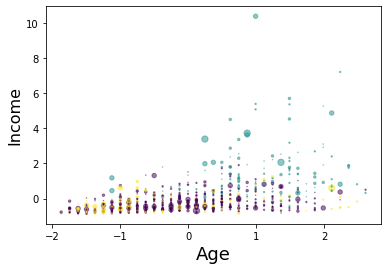

In [10]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

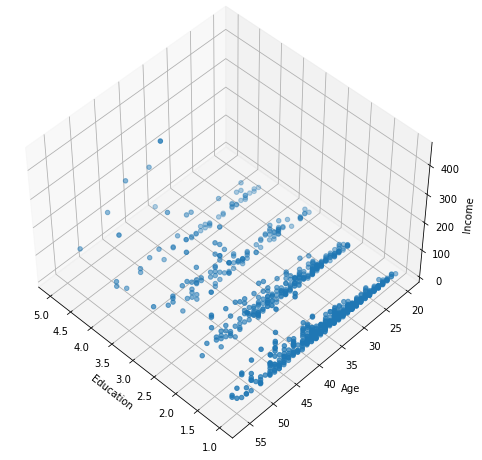

In [11]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot( projection='3d', elev=48, azim=134)
ax.set_position([0, 0, .95, 1])

plt.cla()

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(df['Edu'], df['Age'], df['Income'])
plt.show()
